In order to visualize the distribution of some unlabeled data in which the input values have multiple dimension, we must reduce the number of feature dimension to two or three.This process is known as **dimensionality reduction**. It is also useful for data compression.

**Principal Component Analysis (PCA)** is a form of dimensionaliry reduction in which input variables in the sample data are transformed into linear uncorrelated variables. These transformed features are called the **principal components** of the data.

PCA uses a covariance marix and a matrix operation called **Singular Value Decomposition** to calculate the principal components of a given set of input values. The covariance matrix is generally calculated from the input values after mean normalization, which is simply ensuring that each feature has a zero mean value.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

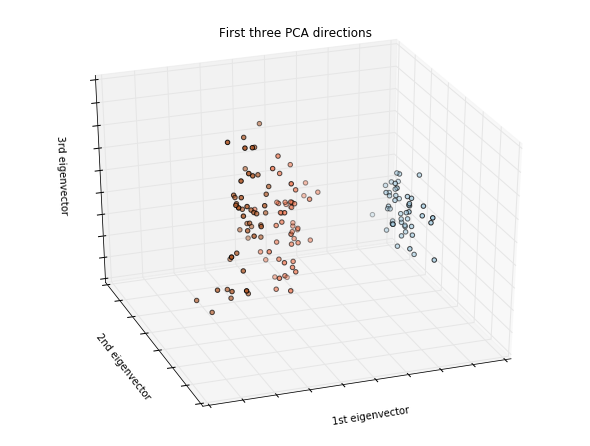

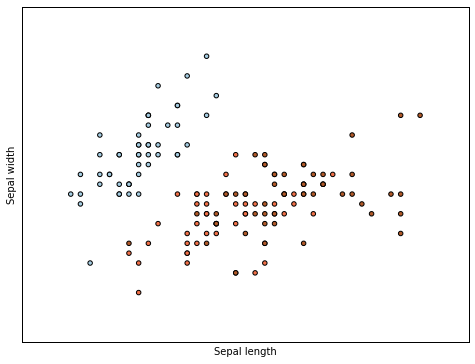

In [7]:
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() -.5, X[:, 1].max() + .5

plt.figure(2, figsize=(8,6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap = plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components = 3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y, cmap = plt.cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## Comparison of LDA and PCA 2D projection of Iris dataset

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Explained variance ratio (first two components): [ 0.92461621  0.05301557]


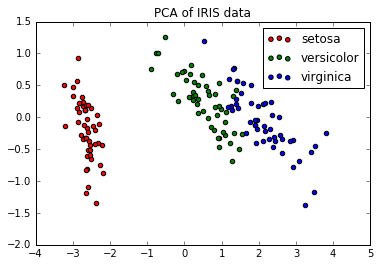

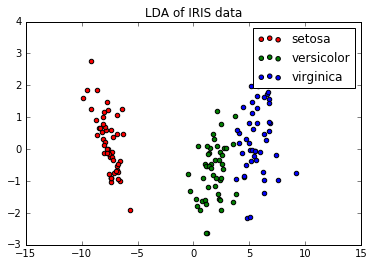

In [15]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

print("Explained variance ratio (first two components): %s"
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip ("rgb", [0,1,2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)

plt.legend()
plt.title("PCA of IRIS data")

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)

plt.legend()
plt.title("LDA of IRIS data")

plt.show()